In [2]:
#Solucion modal para el caso no amortiguado 398
#analisis modal con amortiguamiento 414
#Métodos numericos en el analisis modal 418
#Excitacion en la base pag 451
#analisis modal 518
#Live 6/2/2022 10:05 AM Min 24

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [4]:
m_vec = [621.3765,786.9466,788.8027,790.6588,790.6588,790.6588,793.0452,795.4316,795.4316,795.4316,798.3483,820.7107,1173.1573,1210.9795]
M = np.diag(m_vec)
K = np.array([[6283.43,-6283.43,0,0,0,0,0,0,0,0,0,0,0,0],
              [-6283.43,13776.47,-7493.04,0,0,0,0,0,0,0,0,0,0,0],
              [0,-7493.04,15158.02,-7664.978,0,0,0,0,0,0,0,0,0,0],
              [0,0,-7664.978,15475.74,-7810.77,0,0,0,0,0,0,0,0,0],
              [0,0,0,-7810.77,15666.84,-7856.08,0,0,0,0,0,0,0,0],
              [0,0,0,0,-7856.08,15753.85,-7897.78,0,0,0,0,0,0,0],
              [0,0,0,0,0,-7897.78,15831.57,-7933.79,0,0,0,0,0,0],
              [0,0,0,0,0,0,-7933.79,15876.99,-7943.21,0,0,0,0,0],
              [0,0,0,0,0,0,0,-7943.21,15913.55,-7970.35,0,0,0,0],
              [0,0,0,0,0,0,0,0,-7970.35,15927.91,-7957.56,0,0,0],
              [0,0,0,0,0,0,0,0,0,-7957.56,15952.17,-7994.61,0,0],
              [0,0,0,0,0,0,0,0,0,0,-7994.61,16216.98,-8222.37,0],
              [0,0,0,0,0,0,0,0,0,0,0,-8222.37,60779.01,-52556.63],
              [0,0,0,0,0,0,0,0,0,0,0,0,-52556.63,108208.429]], dtype=float)*1000
J = np.ones((M.shape[0],1))

In [ ]:
w2,phi = linalg.eig(K,M)
i = np.argsort(w2)
#w2 = np.round(np.sort(w2),4)
w2 = w2[i]
phi = phi[:,i]
T_i = np.round(np.real(2*np.pi/np.sqrt(w2)),3)
T_i

In [ ]:
def phi_i(val_max,phi):
    phi_n = []
    for i in range(0,phi.shape[1]):
        phi_n.append(phi[:,i]/phi[:,i][-1])
    return np.array(phi_n).T

def phi_norm(phi_no_n):
    phi_normalizada = []
    for i in range(0,phi_no_n.shape[1]):
        phi_normalizada.append(phi_no_n[:,i]/np.sqrt(phi_no_n[:,i].T.dot(M).dot(phi_no_n[:,i])))
    return np.array(phi_normalizada).T

In [ ]:
phi_f = np.round(phi_i(1,phi),4)
phi_n = phi_norm(phi_f)
#Reacomodar matriz de desplazamientos modales en orden 
#descendente según su coef. de particimacion modal
#i = np.flip(np.argsort(np.abs(phi_n[0,:])))
#phi_n = phi_n[:,i]

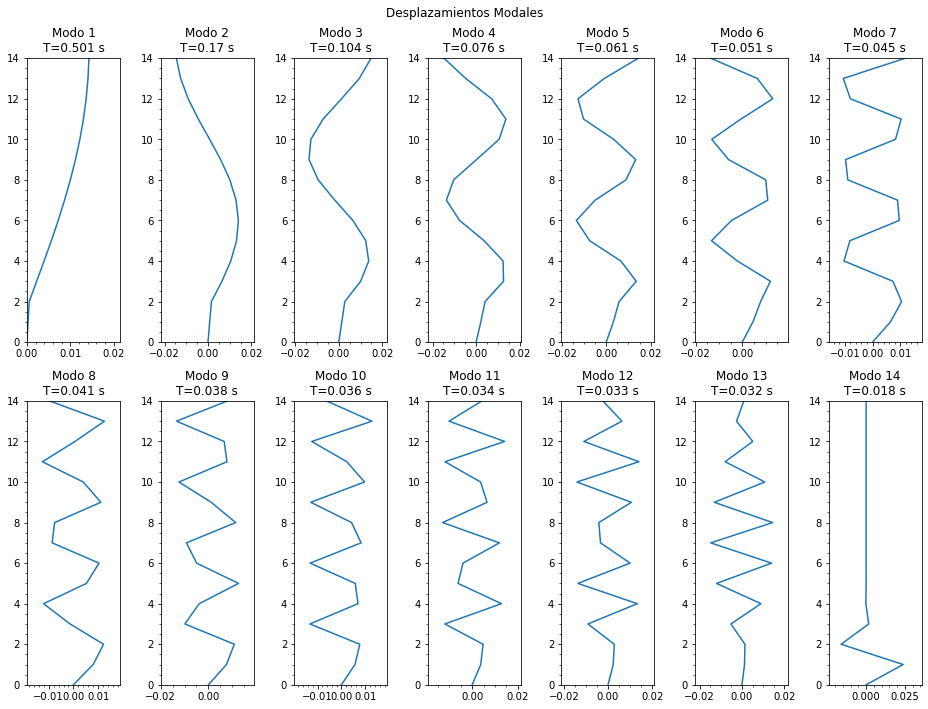

In [424]:
fig = plt.figure(figsize=(13,10))
for i in range(0,phi_n.shape[1]):
    x = np.append(phi_n[:,i],0)
    y = np.flip(np.arange(0,phi_n.shape[0]+1,1))
    ax = fig.add_subplot(2,7,i+1)
    ax.plot(x,y)
    ax.set_ylim(0,phi_n.shape[0])
    ax.set_xlim(np.min(x)*1.5,np.max(x)*1.5)
    ax.minorticks_on()
    ax.set_title('Modo {0}\nT={1} s'.format(i+1,T_i[i]))
    
fig.suptitle('Desplazamientos Modales')
plt.tight_layout()
plt.savefig('./figura1')

In [461]:
#Coeficiente de participación modal
fp = (M.diagonal().dot(phi_n)/M.diagonal().dot(np.power(phi_n,2)))
fp

array([90.32  , 31.8881, 21.2289, 17.6148, 16.6005, 17.1367, 18.7503,
       19.2038, 15.5817, 10.2673,  6.1341,  3.5256,  1.7171, 11.1973])

In [462]:
#Masas modales
wm = np.power(M.diagonal().dot(phi_n),2)/M.diagonal().dot(np.power(phi_n,2))
wm

array([8157.6992, 1016.8527,  450.667 ,  310.2799,  275.575 ,  293.6661,
        351.5744,  368.7842,  242.789 ,  105.418 ,   37.6272,   12.4299,
          2.9483,  125.3794])

In [465]:
#Porcentajes de participacion modal de masas
wm/M.diagonal().dot(J)

array([0.6942, 0.0865, 0.0383, 0.0264, 0.0234, 0.025 , 0.0299, 0.0314,
       0.0207, 0.009 , 0.0032, 0.0011, 0.0003, 0.0107])

## Obtención de desplazamientos modales 

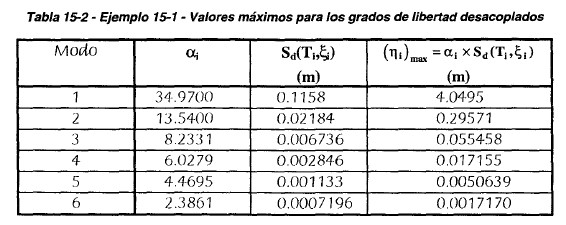

In [429]:
#Grado de libertad desacoplado
n_max = [0.784,1.0753,1.1614,0.9274,0.809,0.7861,0.7082,
         0.6558,0.6178,0.5763,0.434,0.3483,0.03483,0.03483/2]
n = []
for i in range(0,len(n_max)):
    n.append(fp[i]*n_max[i]*100/w2[i])
ro_mod = np.diag(n)

In [466]:
np.set_printoptions(precision=4, suppress=True)
u_mod = np.real(phi_n.dot(ro_mod))

## Fuerzas modales

In [467]:
#Fuerzas modales
np.set_printoptions(precision=1, suppress=True)
F_mod = K.dot(u_mod)
F_mod[:,0]

array([62796.4, 78285.1, 76142.3, 72816. , 68182.3, 62546.3, 56088.6,
       48762.5, 40493.8, 31630.5, 22316.6, 12969.2,  4364.1,  2169.7])

In [468]:
#Cortante máximo modal de piso
vi = []
for i in range(0,F_mod.shape[1]):
    vi.append(np.cumsum(F_mod[:,i]))
Vm_i = np.array(vi).T
Vm_i[:,0]

array([ 62796.4, 141081.5, 217223.8, 290039.8, 358222.2, 420768.5,
       476857.1, 525619.5, 566113.3, 597743.8, 620060.5, 633029.6,
       637393.7, 639563.4])

## Cortante basal 

In [433]:
np.set_printoptions(precision=3, suppress=True)
V_mod = J.T.dot(F_mod)
V_mod

array([[639563.373+0.j, 109342.227+0.j,  52340.427+0.j,  28775.09 +0.j,
         22293.982+0.j,  23085.508+0.j,  24897.532+0.j,  24182.991+0.j,
         14999.697+0.j,   6075.246+0.j,   1633.031+0.j,    432.968+0.j,
            10.27 +0.j,    218.365+0.j]])

## Momento de vuelco 

In [482]:
h = np.array([41.4,38,34.6,31.2,27.8,24.4,21,17.6,14.2,10.8,7.4,4,0,-3.2])
M_j = h.dot(F_mod/100) #kg-m
M_j

array([170653.7,  -9665.5,   1980.5,  -1060.8,     61.8,   -643.4,
         -397.9,   -700.3,   -386. ,   -209.8,    -52.3,    -16.7,
           -0.4,    -17.2])

## Combinación de Respuestas Modales 

In [435]:
#Regla de combinacion modal de Rosenblueth
#Desplazamientos maximos
U_max = np.sqrt(np.sum(np.power(u_mod,2), axis=1))
U_max

array([0.645+0.j, 0.635+0.j, 0.615+0.j, 0.587+0.j, 0.55 +0.j, 0.504+0.j,
       0.451+0.j, 0.392+0.j, 0.326+0.j, 0.256+0.j, 0.18 +0.j, 0.102+0.j,
       0.024+0.j, 0.012+0.j])

In [436]:
#Cortantes Maximos de piso
V_max = np.sqrt(np.sum(np.power(Vm_i,2), axis=1))
V_max

array([ 78140.682+0.j, 162734.931+0.j, 239816.656+0.j, 309430.885+0.j,
       372753.014+0.j, 430366.321+0.j, 482302.791+0.j, 528294.612+0.j,
       567827.357+0.j, 600626.432+0.j, 625944.669+0.j, 642424.636+0.j,
       649131.991+0.j, 653501.358+0.j])

In [437]:
#Cortante basal máximo
Vb_max = np.round(np.sqrt(np.sum(np.power(V_mod,2))),2)
Vb_max

(653501.36+0j)

In [438]:
#Momento de Vuelco Maximo
Mb_max = np.round(np.sqrt(np.sum(np.power(M_j,2))),2)
Mb_max

(17094560.62+0j)

In [439]:
#Fuerzas horizontales Estáticas Máximas
F_max = np.array([np.round(V_max[i]-V_max[i-1],2) if i!=0 else np.round(V_max[i],2) for i in range(0,V_max.shape[0])])
F_max

array([78140.68+0.j, 84594.25+0.j, 77081.72+0.j, 69614.23+0.j,
       63322.13+0.j, 57613.31+0.j, 51936.47+0.j, 45991.82+0.j,
       39532.74+0.j, 32799.07+0.j, 25318.24+0.j, 16479.97+0.j,
        6707.35+0.j,  4369.37+0.j])

In [440]:
#Momento de volteo máximo
Mb_e = np.round(h.dot(F_max.T),2)
Mb_e

(1750972675.6+0j)

## Resoluciones de Ec. Desacopladas 

In [441]:
#Diagonalizo K y M
K_d = phi_n.T.dot(K).dot(phi_n)
np.diag(K_d)

array([   156.972,   1370.05 ,   3677.37 ,   6878.187,  10735.264,
        14937.637,  19188.196,  23198.987,  26994.635,  30709.769,
        34172.086,  37092.583,  39169.471, 118725.719])

In [442]:
#Diagonalizo M
M_d = phi_n.T.dot(M).dot(phi_n)
np.diag(M_d)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [443]:
#Factor de participación modal
fp = (M.diagonal().dot(phi_f)/M.diagonal().dot(np.power(phi_f,2)))
fp

array([0.023, 0.025, 0.03 , 0.038, 0.053, 0.079, 0.121, 0.154, 0.118,
       0.058, 0.023, 0.008, 0.002, 0.268])

In [484]:
np.set_printoptions(precision=4, suppress=True)
u_1 = phi_n[:,0]*0.0204
u_2 = phi_n[:,1]*0.00593228*1070

In [446]:
u_2

array([-0.0926, -0.08  , -0.058 , -0.0283,  0.0048,  0.037 ,  0.064 ,
        0.0821,  0.0889,  0.0836,  0.0667,  0.0408,  0.0101,  0.005 ])

In [447]:
K.dot(u_1)

array([28.3979, 35.4022, 34.4332, 32.929 , 30.8335, 28.2848, 25.3644,
       22.0514, 18.3122, 14.304 , 10.0921,  5.8649,  1.9735,  0.9812])

In [448]:
F_mod[:,1]

array([-31078.548 +0.j, -34028.4669+0.j, -24717.9153+0.j, -12081.0373+0.j,
         2049.8231+0.j,  15821.9712+0.j,  27427.5258+0.j,  35286.0525+0.j,
        38212.1378+0.j,  35901.6057+0.j,  28777.0355+0.j,  18110.6217+0.j,
         6399.1706+0.j,   3262.251 +0.j])

In [449]:
K.dot(u_2)

array([-78821.3384, -86302.9155, -62689.517 , -30639.8977,   5198.7565,
        40127.645 ,  69561.6247,  89492.4011,  96913.5314,  91053.5655,
        72984.2478,  45932.1149,  16229.5611,   8273.7131])

In [485]:
T_i

array([0.501, 0.17 , 0.104, 0.076, 0.061, 0.051, 0.045, 0.041, 0.038,
       0.036, 0.034, 0.033, 0.032, 0.018])